# PREDICTION OF MUSIC GENRE BASED ON SOUND FEATURES AND TRACK TITLES

### By Shailesh Rao 

#### Importing necessary libraries:

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [263]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [264]:
from tensorflow.keras.callbacks import EarlyStopping

#### Setting client environment variables to use Spotify Dev API

In [265]:
import os
os.environ['SPOTIPY_CLIENT_ID'] = "d3be1890719e4602b27e53e4aed18e41"
os.environ['SPOTIPY_CLIENT_SECRET'] = "31a192e4f8404ac398e28314a08161ec"
os.environ['SPOTIPY_REDIRECT_URI'] = "https://localhost:8080"

In [266]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials 
client_id = os.environ.get("SPOTIPY_CLIENT_ID")
client_secret = os.environ.get("SPOTIPY_CLIENT_SECRET")
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 

In [267]:
token = util.prompt_for_user_token("31zahq3gf5zm3oansaxx76hufvpm")

#### Example of extraction of audio features for a particular track:

In [268]:
sp.audio_features(["55LK166LWHOpXOroZ5g82J"])

[{'danceability': 0.41,
  'energy': 0.455,
  'key': 4,
  'loudness': -8.071,
  'mode': 1,
  'speechiness': 0.0316,
  'acousticness': 0.731,
  'instrumentalness': 0,
  'liveness': 0.185,
  'valence': 0.361,
  'tempo': 90.993,
  'type': 'audio_features',
  'id': '55LK166LWHOpXOroZ5g82J',
  'uri': 'spotify:track:55LK166LWHOpXOroZ5g82J',
  'track_href': 'https://api.spotify.com/v1/tracks/55LK166LWHOpXOroZ5g82J',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/55LK166LWHOpXOroZ5g82J',
  'duration_ms': 243592,
  'time_signature': 4}]

In [269]:
def get_album_track_features(album_url):
    '''computes features of all the tracks in a given album'''
    album = sp.album(album_url)
    artist = album["artists"][0]["name"] 
    tracks = sp.album_tracks(album_url)
    track_list = tracks["items"]
    id_list = []
    for track in track_list:
      id_list.append(track["id"]) 
    feature_list = sp.audio_features(id_list)
    for i in range(len(feature_list)):
      feature_list[i]["track_name"] = sp.track(feature_list[i]["id"])["name"]
      feature_list[i]["artist"] = artist
    return feature_list

In [270]:
def clean_dataframe(df):
    '''removes unnecessary features'''
    return df.drop(["type", "id", "uri", "track_href", "analysis_url"], axis = 1)

In [271]:
def extract(url):
    '''extracts features from album and creates dataframe'''
    return clean_dataframe(pd.DataFrame(get_album_track_features(url)))

> genres: 
>>1. POP
>>2. RAP
>>3. CLASSICAL
>>4. ROCK
>>5. LO-FI

### POP

In [272]:
#Extracting songs from albums of artists like Taylor Swift, Lady Gaga, BTS, etc.

pop_df = pd.concat([
    extract("https://open.spotify.com/album/6rWmdSJIaGTVtdMJQ35Lvf?si=JHyCkvRrQNiXNrDCRcdLtw"),
    extract("https://open.spotify.com/album/151w1FgRZfnKZA9FEcg9Z3?si=Moj2qaemTVKlmGP6DieeQA"),
    extract("https://open.spotify.com/album/1yGbNOtRIgdIiGHOEBaZWf?si=_J3HG9ssQAWvz-mpJOkcuA"),
    extract("https://open.spotify.com/album/2fYhqwDWXjbpjaIJPEfKFw?si=3VwXm-BSSdCUSl_zE0V-HQ"),
    extract("https://open.spotify.com/album/74vajFwEwXJ61OW1DKSPEa?si=B3E-lL0jTiGldOoFYD6Yaw"),
    extract("https://open.spotify.com/album/3jB9yFDwRe3KhtGnHXJntk?si=w0Vo9UjmQAmgjZAkL4V2dw"),
    extract("https://open.spotify.com/album/06SY6Ke6mXzZHhURLVU57R?si=q3HddAP2SCKMzSQJPJ_rZw"),
    extract("https://open.spotify.com/album/2X8UOIkZQdcz2Hi5Ynt2uk?si=0w7GJ3j2Qmm3AbuiVCS-cA"),
    extract("https://open.spotify.com/album/7pomP86PUhoJpY3fsC0WDQ?si=-Kq_eLjNT8y87-C3IIFpag"),
    extract("https://open.spotify.com/album/2JTn8KdFeeS4nVz4TTfUpS?si=mipBz_bIS7OAUH0ZI6wF0w"),
    extract("https://open.spotify.com/album/4TqgXMSSTwP3RCo3MMSR6t?si=8MTMOTxBTHaF0trnGXGFbw"),
    extract("https://open.spotify.com/album/6rePArBMb5nLWEaY9aQqL4?si=NF-r3HZiQKix_xx8zkhpMQ"),
    extract("https://open.spotify.com/album/6LY3AerY6KNGOPsNPL63Kk?si=AxScfHPsTp6JnDr1Y2FMdw"),
    extract("https://open.spotify.com/album/4yP0hdKOZPNshxUOjY0cZj?si=0AvKo-yBTJ2Y2T7yGKt9zw"),
    extract("https://open.spotify.com/album/2ODvWsOgouMbaA5xf0RkJe?si=cvVzoS-QQDO_wNRkvgdtEA"),
])

In [273]:
#Setting a genre column, marking all these songs as Pop
pop_df["genre"] = "POP"

In [274]:
pop_df.shape


(263, 16)

### RAP

In [275]:
rap_df = pd.concat([
    extract("https://open.spotify.com/album/2rLqUcipEjIKK9rma5OTN8?si=e_73kTEKQiWBjO8Pwng6rA"),
    extract("https://open.spotify.com/album/39xhYyNNDatQtgKw2KdXMz?si=ryswBiMjThOCvQIYT6-dyQ"),
    extract("https://open.spotify.com/album/26ztFK3E69j5THJQdyxC5w?si=HgPULiFtSH2SjxNd-vz6hQ"),
    extract("https://open.spotify.com/album/3aTuW4BtsyyyyQa9LKqj8n?si=t0_RdwjhTlazUMHFKRtrYg"),
    extract("https://open.spotify.com/album/3MKvhQoFSrR2PrxXXBHe9B?si=k62w5CCXQV6dFT0868xVnw"),
    extract("https://open.spotify.com/album/0U6ldwLBEMkwgfQRY4V6D2?si=jNOUTyZwQHiJh7iIl0x_rg"),
    extract("https://open.spotify.com/album/4eLPsYPBmXABThSJ821sqY?si=2FYdMNDwRQyllmgBI52lKQ"),
    extract("https://open.spotify.com/album/79ONNoS4M9tfIA1mYLBYVX?si=_8doUSyfTGKtt_VQLzalUA"),
    extract("https://open.spotify.com/album/3SpBlxme9WbeQdI9kx7KAV?si=YX_jyN46ShWbGRAToEqsWw"),
    extract("https://open.spotify.com/album/5MS3MvWHJ3lOZPLiMxzOU6?si=xw66Kvk7Rca40emk8-rFwA"),
    extract("https://open.spotify.com/album/1epY9c6AGBfirYxDA9exOB?si=rW6EurhtS0ySHZsFB3W_ug"),
    extract("https://open.spotify.com/album/4JAvwK4APPArjIsOdGoJXX?si=rGVCQ3C1QHSBFOWanaeY7w"),
    extract("https://open.spotify.com/album/4Wv5UAieM1LDEYVq5WmqDd?si=tWLOIbSlRDaOn95kqb0tZQ"),
    extract("https://open.spotify.com/album/41GuZcammIkupMPKH2OJ6I?si=Shg1KihGTB2hLGR_IWXbpA"),
    extract("https://open.spotify.com/album/42WVQWuf1teDysXiOupIZt?si=KJzZKHojRGimvyiAMpfxtA"),
])

In [276]:
rap_df["genre"] = "RAP"

In [277]:
rap_df.shape

(310, 16)

### CLASSICAL

In [278]:
classical_df = pd.concat([
    extract("https://open.spotify.com/album/7i48AP6XdHz4RVvWg1liMw?si=PvYU1svrQVi3enLK9hY8dA"),
    extract("https://open.spotify.com/album/4JPDEqeaiXpxOFC5T071jF?si=Vmuw8Y52RTy2AzPEit84Xw"),
    extract("https://open.spotify.com/album/1JaRlop7F6oMMCjCqmmEHm?si=dZwVVbxmRXq9yuI0QBf4cw"),
    extract("https://open.spotify.com/album/6mwd9lous9aGi5unVn4uLy?si=eNKX0nlBQw2A6vVOvnJc1w"),
    extract("https://open.spotify.com/album/62BhnZaxCiFKSFoJ7YhqQM?si=FG-f08YmTWuZIQtRAzjTeQ"),
    extract("https://open.spotify.com/album/5GaJZ4fUy8qYNz0Nbhkc5O?si=ImnFM1EOQEKvWtlY5KLA4A")
])

In [279]:
classical_df["genre"] = "CLASSICAL"

In [280]:
classical_df.shape


(253, 16)

In [281]:
def artist_tracks_df(id):
    '''retrieving all the tracks from a particular artist'''
    albums = sp.artist_albums(id)["items"]
    df = extract(albums[0]["id"])
    for i in range(1, len(albums)):
        df = pd.concat([df, extract(albums[i]["id"])])
    return df

### ROCK

In [282]:
rock_df = artist_tracks_df("https://open.spotify.com/artist/711MCceyCBcFnzjGY4Q7Un?si=xJJJuInPTm6slnYF1S7iSw")

In [283]:
rock_df = pd.concat([rock_df, 
extract("https://open.spotify.com/album/6i6folBtxKV28WX3msQ4FE?si=gkDFryXOSj-C8tnQlqaJWg"),
extract("https://open.spotify.com/album/4vQ96yyyYbaeTQujH3iTtd?si=hdpFocTQTS-Olgc5WPBN6g")])

In [284]:
rock_df.shape

(269, 15)

In [285]:
rock_df["genre"] = "ROCK"

In [286]:
sp.track("https://open.spotify.com/track/3NsuucK8qXpIJf7KPZX7vq?si=1d39e85dd7ff457b")["artists"]

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/5XE0fiZWGbq9TcSuWwJ1fA'},
  'href': 'https://api.spotify.com/v1/artists/5XE0fiZWGbq9TcSuWwJ1fA',
  'id': '5XE0fiZWGbq9TcSuWwJ1fA',
  'name': 'potsu',
  'type': 'artist',
  'uri': 'spotify:artist:5XE0fiZWGbq9TcSuWwJ1fA'}]

### LO-FI

In [287]:
def playlist_tracks_df(url):
    tracks = sp.playlist_tracks(url)
    id_list = [track["track"]["id"] for track in tracks["items"]]
    feature_list = sp.audio_features(id_list)
    for i in range(len(feature_list)):
      feature_list[i]["track_name"] = sp.track(feature_list[i]["id"])["name"]
      feature_list[i]["artist"] = sp.track(feature_list[i]["id"])["artists"][0]["name"]
    return pd.DataFrame(feature_list).drop(["type", "id", "uri", "track_href", "analysis_url"], axis = 1)
    

In [288]:
lofi_df = playlist_tracks_df("https://open.spotify.com/playlist/3c8ldkG5SDSxFa63dqxGaG?si=7ce4ea3d60c74113")

In [289]:
lofi_df = pd.concat([lofi_df, 
playlist_tracks_df("https://open.spotify.com/playlist/37i9dQZF1E4zBNcvdDKzDT?si=7b1fc3edd3f047b9"),
playlist_tracks_df("https://open.spotify.com/playlist/37i9dQZF1DZ06evO4sQrwQ?si=2b9ef96c11a34616"),
extract("https://open.spotify.com/album/1rgkVX1LxjfqfHcmfVmAjO?si=o0TAKeFbQfuvHTyR0dCsLA"),
extract("https://open.spotify.com/album/5md42pMwna0deA7qlQdJ2U?si=WCLtT-DLRZmjhAQNi1akXw")])

In [290]:
lofi_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_name,artist
0,0.895,0.1090,0,-13.853,0,0.0996,0.5340,0.549,0.1060,0.5460,134.067,118302,4,i'm closing my eyes,potsu
1,0.797,0.0832,11,-12.673,1,0.2030,0.4840,0.810,0.2390,0.5100,160.048,131000,4,thinking of you,mommy
2,0.788,0.4460,6,-9.812,1,0.0693,0.5400,0.694,0.2730,0.5450,80.033,108000,4,controlla,Idealism
3,0.717,0.1930,9,-16.141,0,0.0459,0.8020,0.893,0.0653,0.0447,109.992,195136,4,Snowman,WYS
4,0.790,0.4460,9,-9.273,0,0.0520,0.6560,0.931,0.0933,0.2220,80.002,114203,4,The Girl With the Cappuccino,LoFi Waiter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,0.548,0.4480,9,-7.356,1,0.0435,0.9730,0.929,0.1220,0.1130,78.107,76923,4,Lonely Destiny,Jamie Lean
22,0.629,0.3470,2,-10.006,1,0.0367,0.9660,0.967,0.0952,0.2170,72.489,93333,4,Soften Wave,Jamie Lean
23,0.756,0.3160,1,-11.038,1,0.0805,0.9820,0.936,0.1050,0.4120,90.017,96000,4,Still Need Song,Jamie Lean
24,0.624,0.3970,11,-7.480,0,0.0270,0.0490,0.843,0.1140,0.1290,70.005,94286,4,This Is Love,Jamie Lean


In [291]:
lofi_df["genre"] = "LOFI"

In [292]:
genre_df = pd.concat([pop_df, rap_df, classical_df, lofi_df, rock_df])

*EDA*

danceability

In [293]:
px.box(genre_df, x='genre', y='danceability')

energy

In [294]:
px.box(genre_df, x='genre', y='energy')

loudness

In [295]:
px.box(genre_df, x='genre', y='loudness')

speechiness

In [296]:
px.box(genre_df, x='genre', y='speechiness')

acousticness

In [297]:
px.box(genre_df, x='genre', y='acousticness')

instrumentalness

In [298]:
px.box(genre_df, x='genre', y='instrumentalness')

liveness

In [299]:
px.box(genre_df, x='genre', y='liveness')

valence

In [300]:
px.box(genre_df, x='genre', y='valence')

tempo

In [301]:
px.box(genre_df, x='genre', y='tempo')

duration

In [302]:
px.box(genre_df, x='genre', y='duration_ms')

key

In [303]:
key_map =  {0: 'C',
            1: 'C#',
            2: 'D',
            3: 'Eb',
            4: 'E',
            5: 'F',
            6: 'F#',
            7: 'G',
            8: 'Ab',
            9: 'A',
            10:'Bb',
            11: 'B'}
genre_df["key"] = genre_df["key"].map(key_map)
key = pd.get_dummies(genre_df['key'])
genre_df = pd.concat([genre_df, key], axis = 1)
genre_df.drop('key', axis = 1, inplace = True)


key_df = pd.pivot_table(genre_df, 
                        values=['C', 'C#', 'D', 'Eb', 'E', 'F', 'F#', 'G', 'Ab', 'A', 'Bb', 'B'], 
                        index='genre', 
                        aggfunc={ "C": np.sum,
                                    "C#": np.sum, 
                                    "D": np.sum, 
                                    "Eb": np.sum, 
                                    "E": np.sum,
                                    "F": np.sum,
                                    "F#": np.sum,
                                    "G": np.sum,
                                    "Ab": np.sum,
                                    "A": np.sum,
                                    "Bb": np.sum,
                                    "B": np.sum})

[]

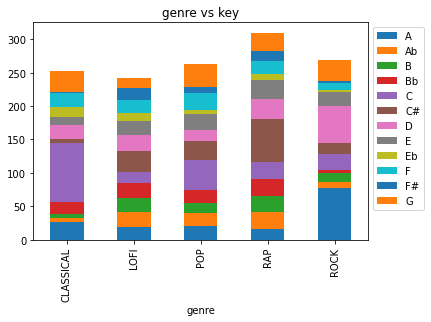

In [304]:
ax = key_df.plot.bar(stacked=True)
ax.set_title("genre vs key",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

In [305]:
genre_df.drop('B', axis = 1, inplace = True)

mode

In [306]:
mode_map =  {0: 'minor', 1: 'major'}
genre_df["mode"] = genre_df["mode"].map(mode_map)
mode = pd.get_dummies(genre_df['mode'])
genre_df = pd.concat([genre_df, mode], axis = 1)
genre_df.drop('mode', axis = 1, inplace = True)


mode_df = pd.pivot_table(genre_df, 
                        values=['minor','major'], 
                        index='genre', 
                        aggfunc={ "minor": np.sum, "major": np.sum})

[]

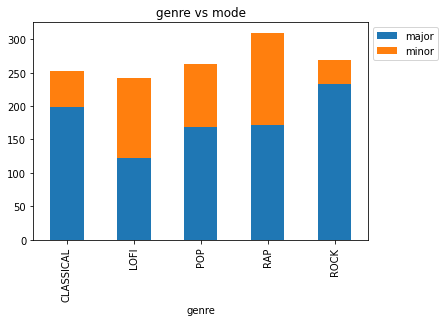

In [307]:
ax = mode_df.plot.bar(stacked=True)
ax.set_title("genre vs mode",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

In [308]:
genre_df.drop('minor', axis = 1, inplace = True)

genre

In [309]:
genre_map = {
    'ROCK': 0,
    'POP': 1,
    'LOFI': 2,
    'CLASSICAL': 3, 
    'RAP': 4
}

genre_df["genre"] = genre_df["genre"].map(genre_map)

training model

In [310]:
X = genre_df.drop(["genre", "track_name", "artist"], axis = 1)
y = genre_df["genre"].values

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [312]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [313]:
genre_prediction_model = Sequential()

In [314]:
X_train.shape

(1002, 23)

In [315]:
genre_prediction_model.add(Flatten())

genre_prediction_model.add(Dense(23, activation='relu'))
genre_prediction_model.add(Dense(23, activation='relu'))

genre_prediction_model.add(Dense(5, activation='sigmoid'))

genre_prediction_model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [316]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [317]:
genre_prediction_model.fit(x=X_train, y=y_train, epochs = 800, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/800
32/32 [==============================] - 2s 19ms/step - loss: 1.5939 - accuracy: 0.2605 - val_loss: 1.5456 - val_accuracy: 0.2746
Epoch 2/800
32/32 [==============================] - 0s 4ms/step - loss: 1.4619 - accuracy: 0.3603 - val_loss: 1.4139 - val_accuracy: 0.3672
Epoch 3/800
32/32 [==============================] - 0s 4ms/step - loss: 1.2881 - accuracy: 0.4541 - val_loss: 1.2373 - val_accuracy: 0.4746
Epoch 4/800
32/32 [==============================] - 0s 7ms/step - loss: 1.0985 - accuracy: 0.5729 - val_loss: 1.0773 - val_accuracy: 0.5552
Epoch 5/800
32/32 [==============================] - 0s 3ms/step - loss: 0.9532 - accuracy: 0.6397 - val_loss: 0.9587 - val_accuracy: 0.6239
Epoch 6/800
32/32 [==============================] - 0s 3ms/step - loss: 0.8512 - accuracy: 0.6697 - val_loss: 0.8787 - val_accuracy: 0.6358
Epoch 7/800
32/32 [==============================] - 0s 4ms/step - loss: 0.7731 - accuracy: 0.7096 - val_loss: 0.8125 - val_accuracy: 0.6716
Epoch 8/800


In [318]:
losses_df = pd.DataFrame(genre_prediction_model.history.history)

<AxesSubplot:>

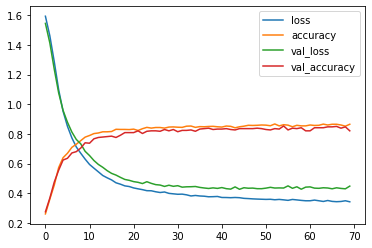

In [319]:
losses_df.plot()

In [320]:
from sklearn.metrics import classification_report


In [321]:
predict_x=genre_prediction_model.predict(X_test) 
classes_x = np.argmax(predict_x, axis=1)


11/11 [==============================] - 0s 1ms/step


In [322]:
print(classification_report(y_test, classes_x))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        64
           1       0.70      0.59      0.64        75
           2       0.94      0.93      0.94        55
           3       0.93      0.96      0.95        55
           4       0.75      0.88      0.81        86

    accuracy                           0.82       335
   macro avg       0.84      0.83      0.83       335
weighted avg       0.82      0.82      0.82       335



In [323]:
!mkdir -p saved_model


A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file saved_model already exists.
Error occurred while processing: saved_model.


In [324]:
genre_prediction_model.save('saved_model/final_model')

INFO:tensorflow:Assets written to: saved_model/final_model\assets


In [325]:
def get_key_dict(key):
    d = {}
    lst = np.eye(12).tolist()[key]
    for i in range(len(lst)):
        d[key_map[i]] = lst[i]
    return d

In [326]:
def transform_key_dict(feat):
    key_dict = get_key_dict(feat["key"])
    feat.update(key_dict) 
    del feat['key']
    del feat['B']
    return feat         
    

In [327]:
def get_features(song_url):
    track = sp.track(song_url)
    features = sp.audio_features([track["id"]])[0]
    track_name = track["name"]
    features.pop('type')
    features.pop('uri')
    features.pop('track_href')
    features.pop('analysis_url')
    features.pop('id')
    features = transform_key_dict(features)
    features['major'] = features['mode']
    del features['mode']
    return features

In [328]:
def predict_genre(song_url, model):
    data = pd.Series(get_features(song_url))
    data = scaler.transform([data])
    predict_x=model.predict(data, verbose=False) 
    classes_x = np.argmax(predict_x)
    my_inverted_dict = dict(map(reversed, genre_map.items()))
    return my_inverted_dict[classes_x], sp.track(song_url)['artists'][0]['name'], sp.track(song_url)['name']



In [336]:
genre, artist, name = predict_genre("https://open.spotify.com/track/5Sn2fm8aisVlR7S6u1KW57?si=2a79bd89077d4bc6", genre_prediction_model)

C:\Users\shail\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



In [337]:
print('Song:', name, '\nArtist:', artist, '\nGenre:', genre )

Song: FAKE LOVE 
Artist: BTS 
Genre: POP
